# ANÁLISE DE ACIDENTES DE TRÂNSITO NO BRASIL


In [1]:
# Importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configuração básica para exibir todas as colunas do nosso dataframe.

pd.set_option('display.max_columns', None)

## Concatenando os Arquivos.

In [3]:
# Leitura dos arquivos.

df_2021 = pd.read_csv('2021.csv', sep=';', encoding='ISO-8859-1')
df_2022 = pd.read_csv('2022.csv', sep=',')
df_2023 = pd.read_csv('2023.csv', sep=';', encoding='ISO-8859-1')
df_2024 = pd.read_csv('2024.csv', sep=',',)

In [4]:
# Tamanho dos arquivos.

print(f'Dados 2021:{df_2021.shape}')
print(f'Dados 2022:{df_2022.shape}')
print(f'Dados 2023:{df_2023.shape}')
print(f'Dados 2024:{df_2024.shape}')

Dados 2021:(64567, 30)
Dados 2022:(64606, 30)
Dados 2023:(67766, 30)
Dados 2024:(53950, 30)


In [5]:
# Concatenando todos os dataframes em um único dataframe..

df_concatenado = pd.concat([df_2021, df_2022, df_2023, df_2024])
print(f'Dados concatenados:{df_concatenado.shape}')

Dados concatenados:(250889, 30)


In [6]:
# Salvando o dataframe como um arquivo .csv

df_concatenado.to_csv('./dados_2021_a_2024.csv', index = False)

## Limpeza e Tratamento

In [7]:
# Leitura de dados.

df = pd.read_csv('dados_2021_a_2024.csv')

In [8]:
# Número de linhas e colunas do dataframe.

print(f'(Número de linhas e colunas: {df.shape})')

(Número de linhas e colunas: (250889, 30))


In [9]:
# Tipo dos dados

df.dtypes

id                        float64
data_inversa               object
dia_semana                 object
horario                    object
uf                         object
br                          int64
km                         object
municipio                  object
causa_acidente             object
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
sentido_via                object
condicao_metereologica     object
tipo_pista                 object
tracado_via                object
uso_solo                   object
pessoas                     int64
mortos                      int64
feridos_leves               int64
feridos_graves              int64
ilesos                      int64
ignorados                   int64
feridos                     int64
veiculos                    int64
latitude                   object
longitude                  object
regional                   object
delegacia                  object
uop           

In [10]:
# Verificando valores ausentes e nulos.

df.isna().sum()

id                          0
data_inversa                0
dia_semana                  0
horario                     0
uf                          0
br                          0
km                          0
municipio                   0
causa_acidente              0
tipo_acidente               0
classificacao_acidente      4
fase_dia                    0
sentido_via                 0
condicao_metereologica      0
tipo_pista                  0
tracado_via                 0
uso_solo                    0
pessoas                     0
mortos                      0
feridos_leves               0
feridos_graves              0
ilesos                      0
ignorados                   0
feridos                     0
veiculos                    0
latitude                    0
longitude                   0
regional                   23
delegacia                  85
uop                       219
dtype: int64

Colunas com valores ausentes e/ou nulos
- classificacao_acidente      4
- regional                   23
- delegacia                  85
- uop                       219

In [11]:
# Verificando linhas duplicadas.

df[df.duplicated()]

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop


Não temos registros duplicadas.

## Tipagem dos Dados.

### Coluna:  <font color="red"> id <font>
    id(float64) → id(int)

In [12]:
# Coluna id.

df['id'] = df['id'].astype(int)

### Coluna:  <font color="red"> data_inversa <font>
    
    data_inversa(object) → data_inversa(datetime)

In [13]:
# Coluna de data_inversa.

df['data_inversa'] = pd.to_datetime(df['data_inversa'])

### Coluna:  <font color="red"> km <font>
    km(object) → km(float)

In [14]:
# Coluna km

df['km'] = df['km'].str.replace(',','.')
df['km'] = df['km'].astype(float)

### Coluna:  <font color="red"> latitude  <font> e <font color='red'> longitude <font>
    latitude(object) → latitude(float);
    longitude(object) → longitude(float).

In [15]:
# Colunas latitude e longitude

df['latitude'] = df['latitude'].str.replace(',','.')
df['longitude'] = df['longitude'].str.replace(',','.')

df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

In [16]:
df.dtypes

id                                 int64
data_inversa              datetime64[ns]
dia_semana                        object
horario                           object
uf                                object
br                                 int64
km                               float64
municipio                         object
causa_acidente                    object
tipo_acidente                     object
classificacao_acidente            object
fase_dia                          object
sentido_via                       object
condicao_metereologica            object
tipo_pista                        object
tracado_via                       object
uso_solo                          object
pessoas                            int64
mortos                             int64
feridos_leves                      int64
feridos_graves                     int64
ilesos                             int64
ignorados                          int64
feridos                            int64
veiculos        

## Valores Nulos e/ou Ausentes


### Coluna: <font color="red"> classificacao acidente </font>



In [17]:
# Verificando valores.

df['classificacao_acidente'].describe()

count                  250885
unique                      3
top       Com Vítimas Feridas
freq                   189879
Name: classificacao_acidente, dtype: object

In [18]:
# Trocando valores Nulos ou ausentes pela moda da coluna.

df['classificacao_acidente'] = df['classificacao_acidente'].fillna('Com Vítimas Feridas')

In [19]:
# Verificando a alteração.

df.isna().sum()

id                          0
data_inversa                0
dia_semana                  0
horario                     0
uf                          0
br                          0
km                          0
municipio                   0
causa_acidente              0
tipo_acidente               0
classificacao_acidente      0
fase_dia                    0
sentido_via                 0
condicao_metereologica      0
tipo_pista                  0
tracado_via                 0
uso_solo                    0
pessoas                     0
mortos                      0
feridos_leves               0
feridos_graves              0
ilesos                      0
ignorados                   0
feridos                     0
veiculos                    0
latitude                    0
longitude                   0
regional                   23
delegacia                  85
uop                       219
dtype: int64

### Coluna: <font color="red"> regional </font>


In [20]:
# Verificando valores.

df['regional'].describe()

count      250866
unique         28
top       SPRF-MG
freq        32281
Name: regional, dtype: object

A coluna `regional` possui 23 valores nulos e/ou ausentes. Como está coluna não irá impactar diretamente em nossa análise.

In [21]:
# Excluindo coluna regional.

df = df.drop(columns='regional')

### Coluna: <font color="red"> delegagia </font>


In [22]:
# Verificando valores.

df['delegacia'].describe()

count       250804
unique         154
top       DEL01-PR
freq         10079
Name: delegacia, dtype: object

A coluna `delegacia` possui 85 valores nulos e/ou ausentes. Como está coluna não irá impactar diretamente em nossa análise, também iremos excluir este coluna

In [23]:
# Excluindo coluna delegacia.

df = df.drop(columns='delegacia')

### Coluna: <font color="red"> uop </font>

In [24]:
# Verificando valores.

df['uop'].describe()

count             250670
unique               404
top       UOP01-DEL01-SC
freq                4088
Name: uop, dtype: object

A coluna `uop` possui 219 valores nulos e/ou ausentes. Como está coluna não irá impactar diretamente em nossa análise.

In [25]:
# Excluindo coluna uop.

df = df.drop(columns='uop')

In [26]:
df.isna().sum()

id                        0
data_inversa              0
dia_semana                0
horario                   0
uf                        0
br                        0
km                        0
municipio                 0
causa_acidente            0
tipo_acidente             0
classificacao_acidente    0
fase_dia                  0
sentido_via               0
condicao_metereologica    0
tipo_pista                0
tracado_via               0
uso_solo                  0
pessoas                   0
mortos                    0
feridos_leves             0
feridos_graves            0
ilesos                    0
ignorados                 0
feridos                   0
veiculos                  0
latitude                  0
longitude                 0
dtype: int64

# Engenharia de Atributos

## Criação de Colunas


Colunas:
- Ano;
- Mês;
- Período do dia;
- Total de feriados.

In [27]:
# Criando uma coluna do tipo datetime com a data completa (ano, mês, dia e horário).

df['data_completa'] = df['data_inversa'].astype(str) + ' ' + df['horario'].astype(str)
df['data_completa'] = pd.to_datetime(df['data_completa'])

In [28]:
# Extraindo o ano, mês e hora.

df['Ano'] = df['data_completa'].dt.year
df['mes'] = df['data_completa'].dt.month
df['horas'] = df['data_completa'].dt.hour
df['periodo'] = df['data_completa'].dt.hour

### Coluna Mês

In [29]:
# Criando um dicionário para os meses.

dic_mes = {
    1:'Janeiro',
    2:'Fevereiro',
    3:'Março',
    4:'Abril',
    5:'Maio',
    6:'Junho',
    7:'Julho',
    8:'Agosto',
    9:'Setembro',
    10:'Outubro',
    11:'Novembro',
    12:'Dezembro'
}



In [30]:
# Atribuindo valores de meses para coluna mes.

df['mes_string'] = df['mes'].map(dic_mes)

### Coluna Período

Coluna com base no horário em que o acidente aconteceu.
- 00 até 05 Madrugada;
- 06 até 11 Manhã;
- 12 até 17 Tarde;
- 18 até 23 Noite. 

In [31]:
# Criando a coluna período de acordo com o intervalo de horas com relação a cada período do dia.

df['periodo'] = pd.cut(df['horas'], 
                             bins = [0, 5, 11,17, 23],
                             labels = ['Madrugada', 'Manhã', 'Tarde', 'Noite']
                            )

### Coluna total_feriados

Coluna que contém a soma da coluna `feriados_leves`  e `feriados_graves`

In [32]:
# Criar a nova coluna total_feriados combinando feridos leves e graves

if 'feridos_leves' in df.columns and 'feridos_graves' in df.columns:
    df['total_feriados'] = df['feridos_leves'] + df['feridos_graves']

    # Calcular o total geral de feridos
    total_feridos = df['total_feriados'].sum()

# Análise Exploratória dos Dados

## Número de Acidentes por ano.


In [33]:
# Calculando o número de acidentes por ano.

df.groupby('Ano').size().reset_index(name = 'Numeros de Acidentes')

,Ano,Numeros de Acidentes
0,2021,64567
1,2022,64606
2,2023,67766
3,2024,53950


Os anos 2021, 2022 e 2023 possuem aproximadamente o mesmo número de acidentes, enquanto que em 2024 temos um pouco mais de 10 mil acidentes a menos. Essa diferença é por que os meses de Outubro, Novembro e Dezembro não estão contabilizados em 2024.

## Frequência de Acidentes por Estado.

In [34]:
# Contar a frequência de acidentes por estado (UF)

freq_por_estado = df['uf'].value_counts()
freq_por_estado

MG    32361
SC    29499
PR    27418
RJ    19501
RS    18270
SP    17044
BA    13605
GO    11914
PE    10725
ES     8838
MT     8544
MS     6356
PB     5870
CE     5370
RO     5304
RN     5164
PI     4624
MA     4208
DF     3690
PA     3285
AL     2323
TO     2276
SE     1998
AC      916
RR      738
AP      605
AM      443
Name: uf, dtype: int64

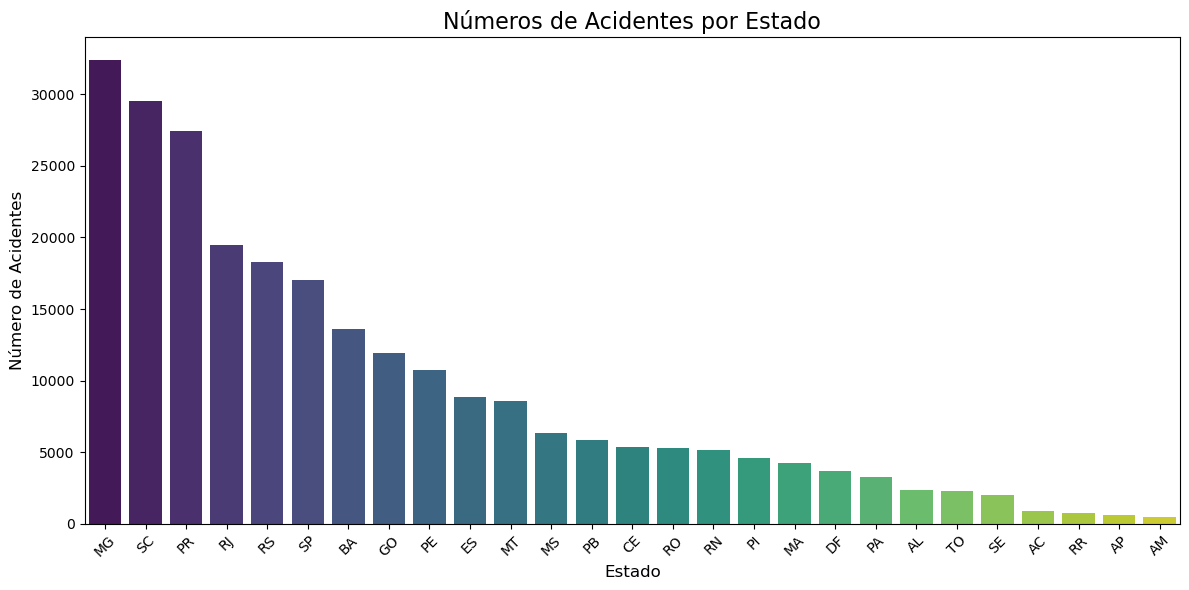

In [35]:
# Gráfico de barras para frequência de acidentes por estado

plt.figure(figsize=(12, 6))
sns.barplot(x=freq_por_estado.index, y=freq_por_estado.values, palette="viridis")
plt.title("Números de Acidentes por Estado", fontsize=16)
plt.xlabel("Estado", fontsize=12)
plt.ylabel("Número de Acidentes", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


O gráfico acima ilustra o número de acidentes no período de 2021 até setembro de 2024. Pelo gráfico, fica evidente que Minas Gerais lidera o número de acidentes, seguido de Santa Catarina e Paraná. 

## Maiores Causas de Acidentes.


Dentro das variáveis propostas, análisar as diferentes causas de acidentes pode nos fornecer alguns insights.

In [36]:
# Contar a frequência das causas de acidentes

causas_freq = df['causa_acidente'].value_counts()

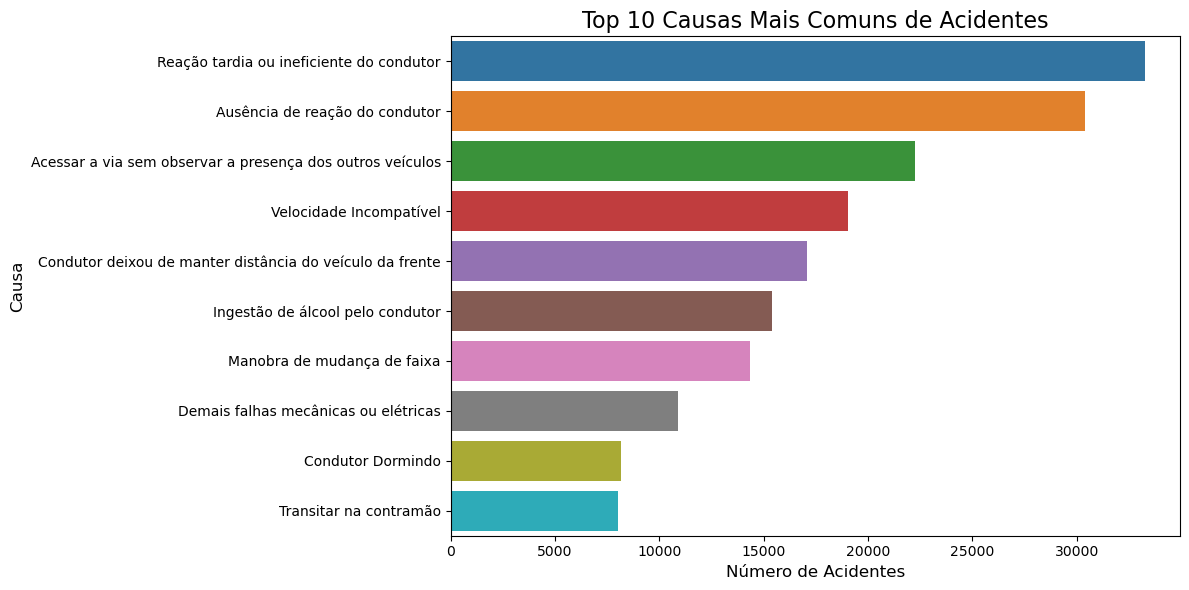

In [37]:
# Gerar gráfico de barras horizontais para as principais causas

top_causas = causas_freq.head(10)  # Selecionar as 10 causas mais frequentes

plt.figure(figsize=(12, 6))
sns.barplot(x=top_causas.values, y=top_causas.index)
plt.title("Top 10 Causas Mais Comuns de Acidentes", fontsize=16)
plt.xlabel("Número de Acidentes", fontsize=12)
plt.ylabel("Causa", fontsize=12)
plt.tight_layout()
plt.show();

De acordo com o gráfico acima, as três principais causas de acidentes são:
- Reação tardia ou ineficiente do conduto;
- Ausência de reação do condutor;
- Acessar via sem observar a presença dos outros veículos.

## Períodos e Horários de Acidentes.

In [38]:
# Contando o número de acidentes por período.

df['periodo'].value_counts()

Tarde        76072
Noite        72210
Manhã        70403
Madrugada    26791
Name: periodo, dtype: int64

Como era de se espearar, existem menos acidentes no período da magrugada. Isso se justifica pelo fato de que a quantidade de pessoas nas estradas de madrugada é menor que de dia.

In [39]:
# Agrupar os dados por hora para identificar os horários mais críticos.

acidentes_por_hora = df['horas'].value_counts().sort_index()

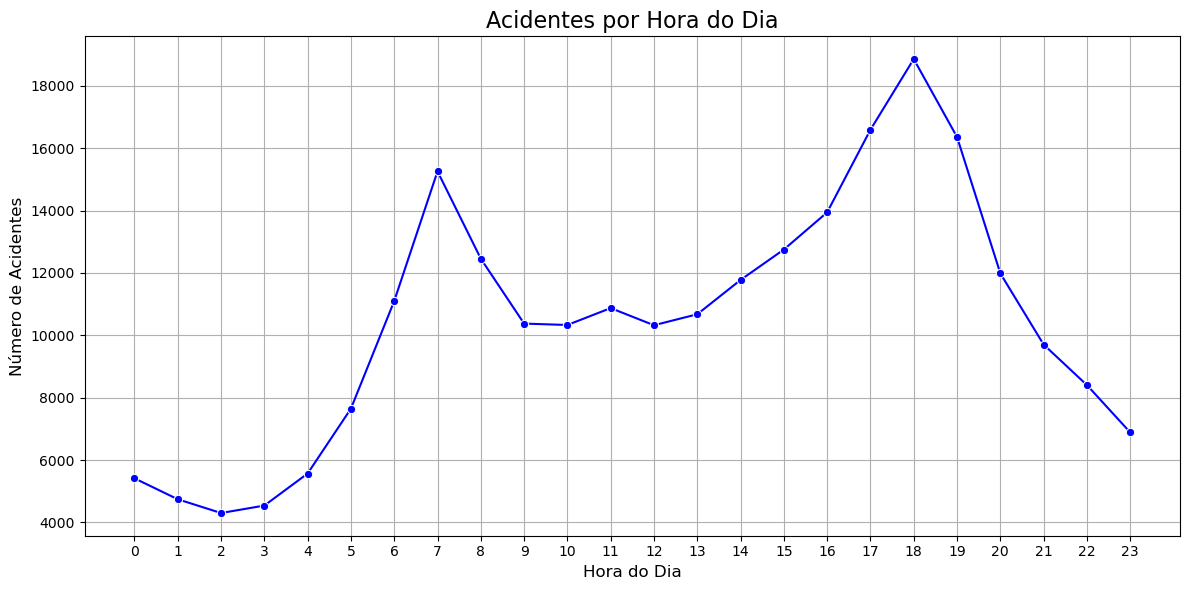

In [40]:
# Gráfico de linha para acidentes por hora

plt.figure(figsize=(12, 6))
sns.lineplot(x=acidentes_por_hora.index, y=acidentes_por_hora.values, marker="o", color="blue")
plt.title("Acidentes por Hora do Dia", fontsize=16)
plt.xlabel("Hora do Dia", fontsize=12)
plt.ylabel("Número de Acidentes", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


O gráfico de linhas evidencia que grande parte dos acidentes acontece por volta das 18 horas e depois por volta das 07 horas da manhã. É interessante analisar o comportamento do gráfico, em que no período envolvendo a madrugada temos menos acidentes e a linha cresce conforme amanhece, tendo um pico as 07 horas. Depois o número de acidentes cai novamente e sofre poucas variações entre 09 horas e 13 horas. Após este horário, o linha volta a subir atingindo o maior pico as 18 horas e após este horário, o número de acidentes volta a cair.

## Número de Acidentes por Dia.

In [41]:
# Contar os acidentes por dia e organizá-los pelos dias da semana.

acidentes_por_dia = df['dia_semana'].value_counts().reindex(
['segunda-feira', 'terça-feira', 'quarta-feira', 'quinta-feira', 'sexta-feira', 'sábado', 'domingo' ]
)
acidentes_por_dia

segunda-feira    34417
terça-feira      30638
quarta-feira     31410
quinta-feira     32370
sexta-feira      38813
sábado           41466
domingo          41775
Name: dia_semana, dtype: int64

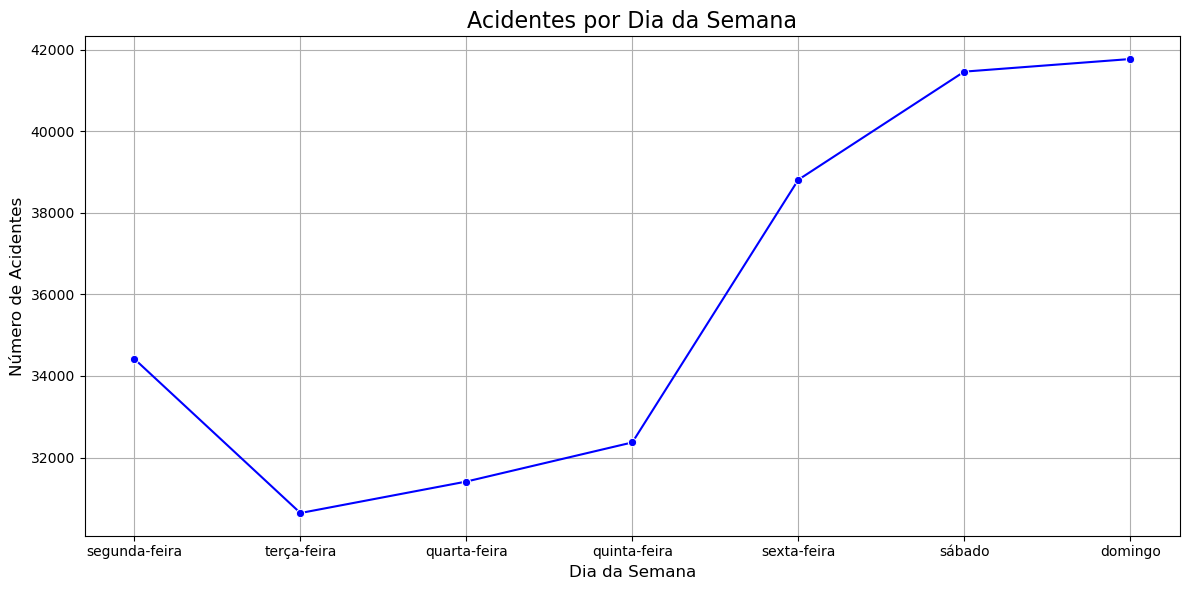

In [42]:
# Gráfico de linha para acidentes por dia da semana

plt.figure(figsize=(12, 6))
sns.lineplot(x=acidentes_por_dia.index, y=acidentes_por_dia.values, marker="o", color="blue")
plt.title("Acidentes por Dia da Semana", fontsize=16)
plt.xlabel("Dia da Semana", fontsize=12)
plt.ylabel("Número de Acidentes", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

O gráfico de linha acima mostra de forma clara quais os dias que temos a maior frequência de acidentes. O dia que menos temos acidente é terça-feira, seguido de quarta-feira e quinta-feira. No final de semana, compreendendo sábado e domingo são os dias em que temos mais acidentes 

## Condições Climáticas e Número de Acidentes

In [43]:
# Contar a frequência de acidentes por condição climática

cond_clim_freq = df['condicao_metereologica'].value_counts()
cond_clim_freq

Céu Claro           156811
Nublado              39117
Chuva                25270
Sol                  14956
Garoa/Chuvisco        8768
Ignorado              3263
Nevoeiro/Neblina      2223
Vento                  463
Granizo                 11
Neve                     7
Name: condicao_metereologica, dtype: int64

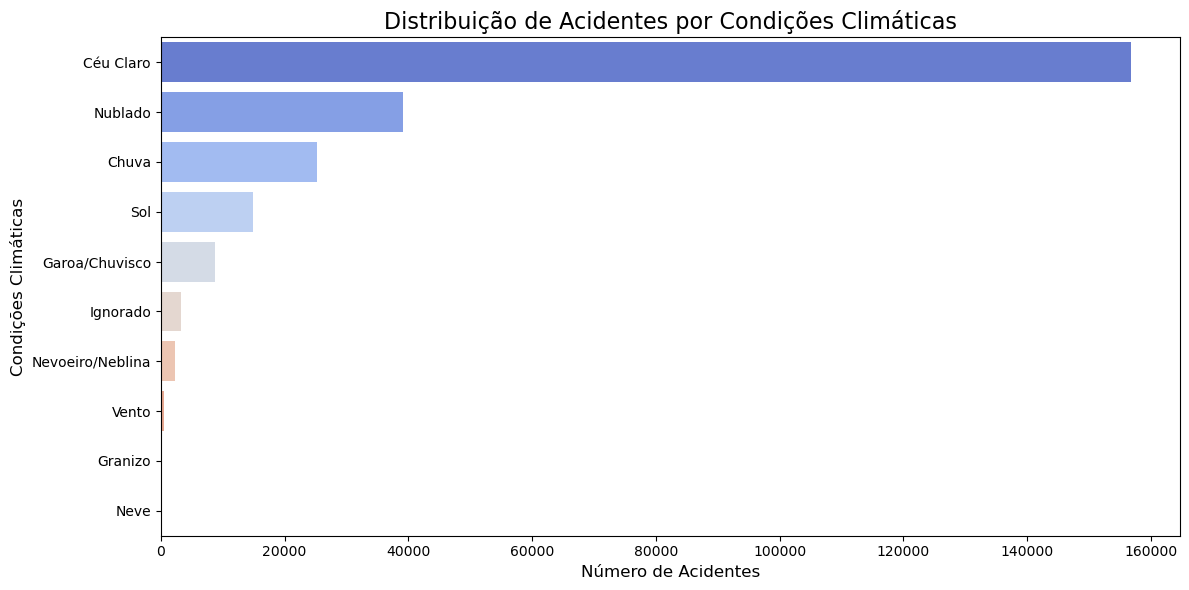

In [44]:
# Gráfico de barras para condições climáticas e número de acidentes

plt.figure(figsize=(12, 6))
sns.barplot(x=cond_clim_freq.values, y=cond_clim_freq.index, palette="coolwarm")
plt.title("Distribuição de Acidentes por Condições Climáticas", fontsize=16)
plt.xlabel("Número de Acidentes", fontsize=12)
plt.ylabel("Condições Climáticas", fontsize=12)
plt.tight_layout()
plt.show()



## Tipo da Pista e o Número de Acidentes

Investigar se o tipo da pista influencia no número de acidentes.

In [45]:
# Encontrando o número de acidentes de acordo com o tipo de pista.

df['tipo_pista'].value_counts()

Simples     123251
Dupla       104622
Múltipla     23016
Name: tipo_pista, dtype: int64

A maior ocorrência de acidentes acontecem em pista simples.